# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [74]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.stats import linregress
#Pull in API and citipy
from api_keys import weather_api_key
from citipy import citipy

#Set the output file
output_file_csv = "../output_data/cities.csv"

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lng = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for coord in lat_lngs:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    country = citipy.nearest_city(coord[0], coord[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))

#Print the country count to confirm it matches city count
print(len(countries))

651
651


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create a dataframe to store the data
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,amderma,,RU,,,,,,
1,barrow,,US,,,,,,
2,kapaa,,US,,,,,,
3,sao joao da barra,,BR,,,,,,
4,dois vizinhos,,BR,,,,,,


In [33]:
#Variables to keep track of response number
record_num = 1
record_set = 1

#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Run the API call for each city
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')
for index, row in city_weather.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + weather_api_key
    
    #API call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {response["name"]}')
        
        #Input data into the dataframe
        city_weather.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity (%)'] = response['main']['humidity']
        city_weather.loc[index, 'Latitude'] = response['coord']['lat']
        city_weather.loc[index, 'Longitude'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp (F)'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record 1 of Set 1 | Barrow
Processing Weather Data for Record 2 of Set 1 | Kapaa
Processing Weather Data for Record 3 of Set 1 | São João da Barra
Processing Weather Data for Record 4 of Set 1 | Dois Vizinhos
Processing Weather Data for Record 5 of Set 1 | Talnakh
Processing Weather Data for Record 6 of Set 1 | Busselton
Processing Weather Data for Record 7 of Set 1 | Dalnegorsk
Processing Weather Data for Record 8 of Set 1 | Vilhena
Processing Weather Data for Record 9 of Set 1 | Kasane
Processing Weather Data for Record 10 of Set 1 | Geraldton
Processing Weather Data for Record 11 of Set 1 | Bredasdorp
Processing Weather Data for Record 12 of Set 1 | Elesbão Veloso
Processing Weather Data for Record 13 of Set 1 | Hermanus
Processing Weather Data for Record 14 of Set 1 | Jamestown
Processing Weather Data for Record 15 of Set 1 | Viedma
Processing Weather Data for Record 16

Processing Weather Data for Record 39 of Set 3 | Torbay
Processing Weather Data for Record 40 of Set 3 | Dakoro
Processing Weather Data for Record 41 of Set 3 | Kargil
Processing Weather Data for Record 42 of Set 3 | Sémbé
Processing Weather Data for Record 43 of Set 3 | Madang
Processing Weather Data for Record 44 of Set 3 | Praia da Vitória
Processing Weather Data for Record 45 of Set 3 | Manzhouli
Processing Weather Data for Record 46 of Set 3 | Bengkulu
Processing Weather Data for Record 47 of Set 3 | Mitsamiouli
Processing Weather Data for Record 48 of Set 3 | Tuma
Processing Weather Data for Record 49 of Set 3 | Tuatapere
Processing Weather Data for Record 50 of Set 3 | Katobu
Processing Weather Data for Record 1 of Set 4 | Butembo
Processing Weather Data for Record 2 of Set 4 | Port Alfred
Processing Weather Data for Record 3 of Set 4 | Sitka
Processing Weather Data for Record 4 of Set 4 | Chokurdakh
Processing Weather Data for Record 5 of Set 4 | Esim
Processing Weather Data fo

Processing Weather Data for Record 31 of Set 6 | Dukat
Processing Weather Data for Record 32 of Set 6 | Deputatsky
Processing Weather Data for Record 33 of Set 6 | Mangualde
Processing Weather Data for Record 34 of Set 6 | Santa Flavia
Processing Weather Data for Record 35 of Set 6 | Lüderitz
Processing Weather Data for Record 36 of Set 6 | Nerchinskiy Zavod
Processing Weather Data for Record 37 of Set 6 | Carahue
Processing Weather Data for Record 38 of Set 6 | Georgetown
Processing Weather Data for Record 39 of Set 6 | Vila Franca do Campo
Processing Weather Data for Record 40 of Set 6 | Anadyr
Processing Weather Data for Record 41 of Set 6 | Abis
Processing Weather Data for Record 42 of Set 6 | Ahipara
Processing Weather Data for Record 43 of Set 6 | Najrān
Processing Weather Data for Record 44 of Set 6 | Caravelas
Processing Weather Data for Record 45 of Set 6 | Fort Nelson
Processing Weather Data for Record 46 of Set 6 | Ostrovnoy
Processing Weather Data for Record 47 of Set 6 | A

Processing Weather Data for Record 21 of Set 9 | Orange
Processing Weather Data for Record 22 of Set 9 | Point Pedro
Processing Weather Data for Record 23 of Set 9 | Manggar
Processing Weather Data for Record 24 of Set 9 | Broome
Processing Weather Data for Record 25 of Set 9 | Vardø
Processing Weather Data for Record 26 of Set 9 | Cherskiy
Processing Weather Data for Record 27 of Set 9 | Neepawa
Processing Weather Data for Record 28 of Set 9 | Koumac
Processing Weather Data for Record 29 of Set 9 | Assiut
Processing Weather Data for Record 30 of Set 9 | Waynesville
Processing Weather Data for Record 31 of Set 9 | Uvinza
Processing Weather Data for Record 32 of Set 9 | Mehrān
Processing Weather Data for Record 33 of Set 9 | Kanhangad
Processing Weather Data for Record 34 of Set 9 | Obo
Processing Weather Data for Record 35 of Set 9 | Nome
Processing Weather Data for Record 36 of Set 9 | Zyryanka
Processing Weather Data for Record 37 of Set 9 | Yinchuan
Processing Weather Data for Recor

Processing Weather Data for Record 10 of Set 12 | Neiafu
Processing Weather Data for Record 11 of Set 12 | Vicuña
Processing Weather Data for Record 12 of Set 12 | Sabang
Processing Weather Data for Record 13 of Set 12 | Safi
Processing Weather Data for Record 14 of Set 12 | Blythe
Processing Weather Data for Record 15 of Set 12 | Puerto Escondido
Processing Weather Data for Record 16 of Set 12 | Champerico
Processing Weather Data for Record 17 of Set 12 | Polunochnoye
Processing Weather Data for Record 18 of Set 12 | Oyem
Processing Weather Data for Record 19 of Set 12 | Udgīr
Processing Weather Data for Record 20 of Set 12 | Takaka
Processing Weather Data for Record 21 of Set 12 | Zhuanghe
Processing Weather Data for Record 22 of Set 12 | Kropotkin
Processing Weather Data for Record 23 of Set 12 | Hīt
Processing Weather Data for Record 24 of Set 12 | Okitipupa
Processing Weather Data for Record 25 of Set 12 | College
Processing Weather Data for Record 26 of Set 12 | Qaqortoq
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
#Clean dataframe to remove cities that were not found
city_weather['Max Temp'] = city_weather['Max Temp'].replace('', np.nan)
city_weather = city_weather.dropna()

# Convert data strings to float
pd.to_numeric(city_weather["Cloudiness (%)"]).astype(float)
pd.to_numeric(city_weather["Humidity (%)"]).astype(float)
pd.to_numeric(city_weather["Latitude"]).astype(float)
pd.to_numeric(city_weather["Longitude"]).astype(float)
pd.to_numeric(city_weather["Max Temp (F)"]).astype(float)
pd.to_numeric(city_weather["Windspeed"]).astype(float)
city_weather['Date'] =  pd.to_datetime(city_weather['Date'])

#Save dataframe
city_weather.to_csv("../output_data/CityWeatherData.csv", index=False, header=True)

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed,Cloudiness (%),Humidity (%),Latitude,Longitude,Max Temp (F)
1,barrow,90,US,1970-01-01 00:00:01.603248776,86,71.29,-156.79,28.40,13.87,90.0,86.0,71.29,-156.79,28.40
2,kapaa,90,US,1970-01-01 00:00:01.603248637,83,22.08,-159.32,82.00,9.17,90.0,83.0,22.08,-159.32,81.00
3,sao joao da barra,74,BR,1970-01-01 00:00:01.603248762,86,-21.64,-41.05,72.46,9.15,66.0,87.0,-21.64,-41.05,72.23
4,dois vizinhos,0,BR,1970-01-01 00:00:01.603248800,78,-25.73,-53.06,66.51,2.51,0.0,77.0,-25.73,-53.06,66.00
5,talnakh,63,RU,1970-01-01 00:00:01.603248801,84,69.49,88.4,8.60,2.24,49.0,92.0,69.49,88.40,6.80


In [47]:
city_weather.agg(['count', 'mean', 'std','min','max'])

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed,Cloudiness (%),Humidity (%),Latitude,Longitude,Max Temp (F)
count,591,591.000000,591,591,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
min,abis,0.000000,AF,1970-01-01 00:00:01.603248510,12.000000,-54.800000,-175.200000,3.200000,0.160000,0.000000,12.000000,-54.800000,-175.200000,3.200000
max,zyryanka,100.000000,ZW,1970-01-01 00:00:01.603249044,100.000000,78.220000,179.320000,98.600000,30.380000,100.000000,100.000000,78.220000,179.320000,98.600000
mean,NaN,51.959391,NaN,1970-01-01 00:00:01.603248903,74.253807,19.388376,21.185431,59.166142,7.758240,51.646362,74.042301,19.388376,21.185431,59.392267
std,NaN,40.075544,NaN,NaN,20.528440,34.043223,89.381719,20.752668,5.388711,39.465778,20.968820,34.043223,89.381719,20.715878


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
city_weather = city_weather[~(city_weather['Humidity'] > 100)]
city_weather
city_weather['Humidity'].max()

100

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = round(city_weather,2)
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
1,barrow,90,US,1603247220,86,71.29,-156.79,28.40,12.75
2,kapaa,90,US,1603246980,83,22.08,-159.32,82.00,9.17
3,sao joao da barra,74,BR,1603247221,86,-21.64,-41.05,72.46,10.04
4,dois vizinhos,0,BR,1603247221,78,-25.73,-53.06,66.51,1.25
5,talnakh,63,RU,1603247221,84,69.49,88.4,8.60,2.24


In [49]:
today  = pd.Timestamp("today").strftime("%m/%d/%Y")
today

'10/20/2020'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

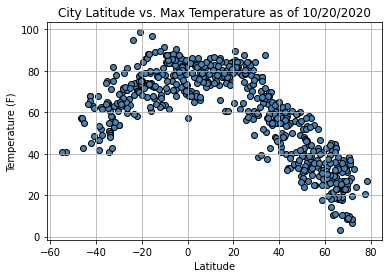

The data appears to suggest that max temperature gets greater as the latitiude get closer to zero (the equator)


In [56]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o",color ='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature as of {today}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#Analysis
print("The data appears to suggest that max temperature gets greater as the latitiude get closer to zero (the equator)")

## Latitude vs. Humidity Plot

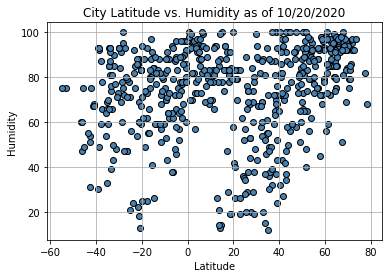

The data appears to show no real relationship between latitude and humidity. An inference can be made that there are more cities in the dataset with high humidity than low humidity.


In [58]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", color ='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity as of {today}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#Analysis
print("The data appears to show no real relationship between latitude and humidity. An inference can be made that there are more cities in the dataset with high humidity than low humidity.")

## Latitude vs. Cloudiness Plot

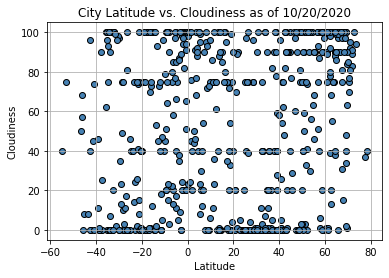

The data appears to show no real relationship between cloudiness and latitude.


In [59]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o",color ='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness as of {today}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#Analysis
print("The data appears to show no real relationship between cloudiness and latitude.")

## Latitude vs. Wind Speed Plot

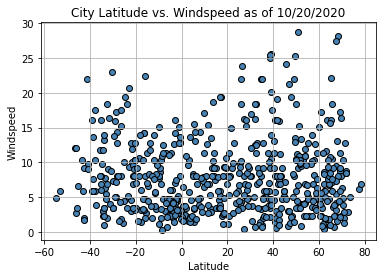

The data appears to show no real relationship between windspeed and latitude. It appears that it was not very windy at the time the data was pulled worldwide.


In [60]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Windspeed"], marker="o",color ='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Windspeed as of {today}')
plt.ylabel("Windspeed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

#Analysis
print("The data appears to show no real relationship between windspeed and latitude. It appears that it was not very windy at the time the data was pulled worldwide.")

## Linear Regression

In [72]:
north_df = clean_city_data.loc[pd.to_numeric(clean_city_data['Lat']).astype(float) > 0,:]
south_df = clean_city_data.loc[pd.to_numeric(clean_city_data['Lat']).astype(float) < 0,:]
north_df.dtypes

City           object
Cloudiness     object
Country        object
Date           object
Humidity       object
Lat            object
Lng            object
Max Temp      float64
Windspeed      object
dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.92x + 89.82
The r-squared is: -0.8865216197562021
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


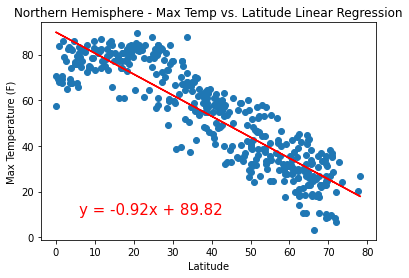

In [87]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.63x + 83.48
The r-squared is: 0.6915765845778271
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the temperature decreases.


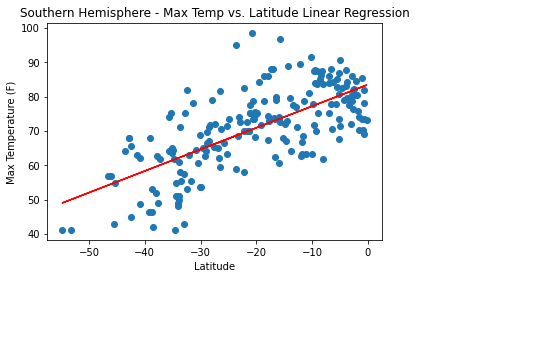

In [88]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the southern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.25x + 66.15
The r-squared is: 0.2424709371764544
The regression does not display and correlation.


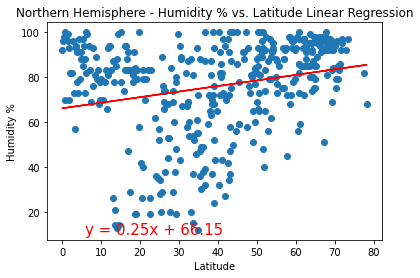

In [78]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Northern Hemisphere - Humidity % vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display and correlation.")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.18x + 74.58
The r-squared is: 0.1326363852581927
The regression does not display and correlation.


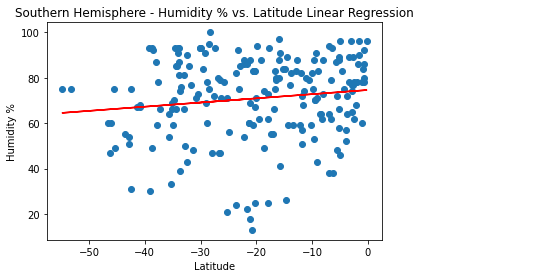

In [79]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Southern Hemisphere - Humidity % vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display and correlation.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.49x + 36.21
The r-squared is: 0.25544942082700434
The regression does not display and correlation.


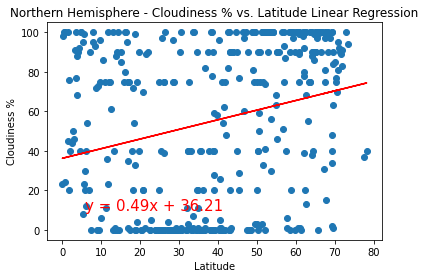

In [83]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Northern Hemisphere - Cloudiness % vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display and correlation.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.68x + 58.6
The r-squared is: 0.2284114404276299
The regression does not display and correlation.


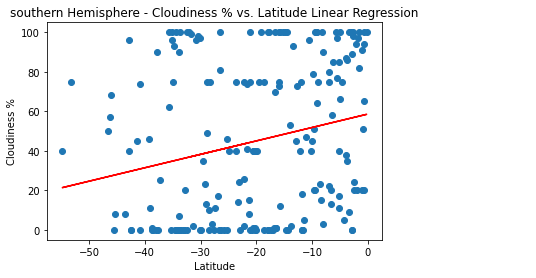

In [85]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('southern Hemisphere - Cloudiness % vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display and correlation.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 7.45
The r-squared is: 0.03198631509319154
The regression does not display and correlation.


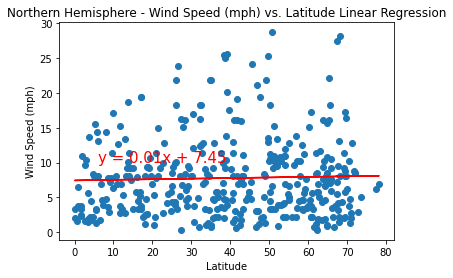

In [82]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Windspeed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display and correlation.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.05x + 6.71
The r-squared is: -0.13627630230524237
The regression does not display and correlation.


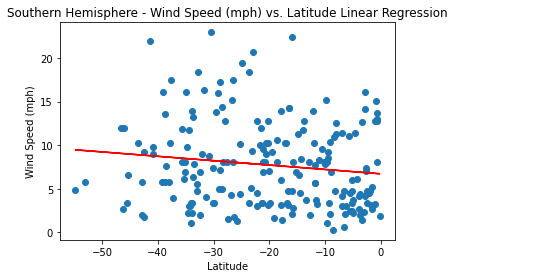

In [86]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Windspeed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display and correlation.")
plt.show()